# Importing necessary libraries 

In [55]:
import yfinance as yf #to get stock data
import pandas as pd #to handle dataframes
import numpy as np #for math
import datetime as dt #to handle dates
import matplotlib.pyplot as plt #for plotting

import riskfolio as rp #riskfolio-Lib to optimize portfolios


# Getting the data

The pandas_datareader library provides a convenient method to fetch historical stock price data from Yahoo Finance

In [56]:
dt.datetime.strptime('2020-01-01', '%Y-%m-%d')

datetime.datetime(2020, 1, 1, 0, 0)

In [57]:
#function to get stock data
#start_date and end_date must be in the datetime format
def getData(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

We try to create initially a diversified portfolio of stocks of the SP500 from different sectors. So that we can aim to have a return-risk that can be adjustable. We will use the following stocks:
- **Technology**: AAPL
- **Healthcare**: JNJ
- **Consumer Discretionary**: AMZN
- **Financials**: JPM
- **Industrials**: BA
- **Consumer Staples**: WMT
- **Energy**: XOM
- **Utilities**: NEE
- **Real Estate**: AMT
- **Materials**: LIN
- **Communication Services**: GOOG

In [58]:
#Our portfolio
stock_list = ['AAPL', 'JNJ', 'AMZN', 'JPM', 'BA', 'WMT', 'XOM', 'NEE', 'AMT', 'LIN', 'GOOG']

In [59]:
start_date = dt.datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = dt.datetime.strptime('2022-12-31', '%Y-%m-%d')

#Get the data
stock_data = getData(stock_list, start_date, end_date)

#only keep the adjusted close price column
stock_data = stock_data['Adj Close']

[*********************100%%**********************]  11 of 11 completed


In [60]:
#Calculate the daily returns
stock_returns = stock_data.pct_change()
#drop the first row which is NaN
stock_returns = stock_returns[1:]

In [61]:
stock_returns

,AAPL,AMT,AMZN,BA,GOOG,JNJ,JPM,LIN,NEE,WMT,XOM
Date,,,,,,,,,,,
2022-01-04,-0.012692,-0.012606,-0.016916,0.027759,-0.004536,-0.002682,0.037910,0.018220,-0.010692,-0.018320,0.037614
2022-01-05,-0.026600,-0.064363,-0.018893,-0.002621,-0.046830,0.006664,-0.018282,0.004640,-0.010476,0.013521,0.012437
2022-01-06,-0.016693,0.001210,-0.006711,-0.008119,-0.000745,-0.003426,0.010624,-0.024249,-0.044133,-0.002779,0.023521
2022-01-07,0.000988,0.006380,-0.004288,0.019684,-0.003973,0.013517,0.009908,-0.005118,0.007462,0.009546,0.008197
2022-01-10,0.000116,-0.008140,-0.006570,-0.028724,0.011456,-0.004944,0.000957,-0.002528,-0.024534,-0.001933,-0.005952
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.008785,0.017425,0.004303,0.017562,0.002542,0.004745,0.005097,0.009959,0.002021,0.026445
2022-12-27,-0.013878,0.000047,-0.025924,0.001798,-0.020933,-0.000282,0.003504,-0.001154,-0.002020,0.000278,0.013894
2022-12-28,-0.030685,-0.003793,-0.014692,-0.005385,-0.016718,-0.004340,0.005465,-0.009241,-0.010000,-0.017523,-0.016426


# Estimating Mean Variance Portfolio
Calculated based on Sharpe Ratio

The model of the estimation of the optimal portfolio can be : 
- Classic (historical) Mean-Variances
- Black-Litterman
- Factor Model

The objective function could be :
- Maximize Sharpe Ratio
- Minimize Risk
- Maximize Return
- Utility Function

In [85]:
#Portfolio object creation
portfolio = rp.Portfolio(returns=stock_returns)

#optimize the portfolio with the objective to maximize the Sharpe Ratio
method_mu = 'hist' #method to estimate expected returns
method_cov = 'hist' #method to estimate covariance matrix

#calculate the inputs that will be used by the optimization function, 
#when we select the input model='classic'
portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov)

#estimate optimal portfolio

model = 'Classic' #portfolio model
rm = 'MV' #risk measure used, this time will be variance
obj = 'Sharpe' #objective function
hist = True #to use historical scenarios for the risk measures
rf = 0 #risk free rate
l = 0 #risk aversion factor, only used when obj = 'Utility'

w = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

#Show the weights
display(w*100)


,weights
AAPL,2.772113e-09
AMT,3.786528e-09
AMZN,1.599523e-09
BA,6.766942e-09
GOOG,2.263473e-09
JNJ,2.071187e+01
JPM,4.575896e-09
LIN,1.063380e-08
NEE,8.168257e-09
WMT,1.687744e-08


It suggests us to not invest in the following stocks: 
- **Technology**: AAPL
- **Consumer Discretionary**: AMZN
- **Financials**: JPM
- **Industrials**: BA
- **Consumer Staples**: WMT
- **Utilities**: NEE
- **Real Estate**: AMT
- **Materials**: LIN
- **Communication Services**: GOOG


### Portfolio composition:

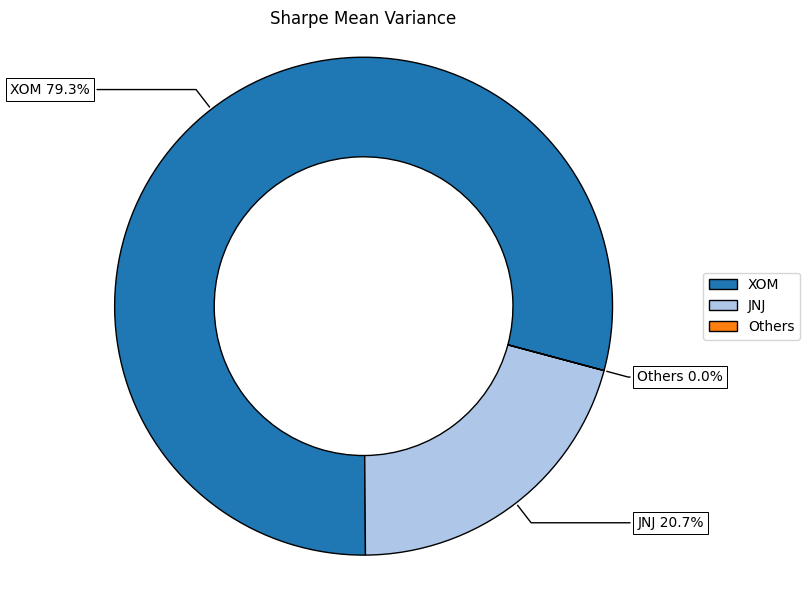

In [87]:
#Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap='tab20')

### Calculation of the efficient frontier:

The efficient frontier represents a set of optimal portfolios, characterized by either the lowest possible risk or the highest anticipated return for a given level of risk. Portfolios situated below the efficient frontier are considered suboptimal as they fail to provide adequate return for the associated risk. Conversely, portfolios positioned to the right of the efficient frontier are deemed less ideal due to their higher risk profile for a specified rate of return.

In [90]:
#number of points in the efficient frontier
points = 100

frontier = portfolio.efficient_frontier(model=model, rm=rm, rf=rf, points=points, hist=hist)

frontier

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
AAPL,7.411256e-10,4.047013e-10,7.419896e-09,9.157456e-09,4.469838e-10,6.880765e-10,2.472156e-09,6.526322e-10,1.207510e-09,9.676637e-10,...,1.348869e-10,1.258046e-10,2.144570e-10,1.583976e-10,1.486387e-10,3.820022e-09,5.721940e-11,1.125431e-09,4.434158e-10,1.915664e-10
AMT,4.224391e-09,9.182803e-10,1.357187e-08,1.744303e-08,8.222823e-10,1.235250e-09,4.163628e-09,1.118635e-09,2.047108e-09,1.587460e-09,...,1.587763e-10,1.546171e-10,2.697488e-10,2.137771e-10,2.012986e-10,5.010681e-09,7.522978e-11,1.387514e-09,5.581233e-10,2.035917e-10
AMZN,5.619280e-10,2.536042e-10,4.396077e-09,5.408258e-09,2.607683e-10,4.026529e-10,1.413737e-09,3.770162e-10,6.987833e-10,5.573809e-10,...,8.478866e-11,7.713696e-11,1.293416e-10,9.009805e-11,8.426702e-11,2.225954e-09,3.273665e-11,6.955828e-10,2.669914e-10,1.324564e-10
BA,2.287659e-02,1.995428e-02,1.677653e-02,1.420047e-02,1.120054e-02,7.567388e-03,3.836451e-03,4.040387e-04,6.175053e-09,2.331534e-08,...,2.726164e-10,2.680683e-10,4.701260e-10,3.725317e-10,3.530724e-10,8.416830e-09,1.328107e-10,2.247751e-09,9.285821e-10,2.875005e-10
GOOG,1.713010e-09,4.733731e-10,7.351733e-09,9.163265e-09,4.408395e-10,6.766231e-10,2.306663e-09,6.188676e-10,1.131787e-09,8.952288e-10,...,1.120652e-10,1.033829e-10,1.749267e-10,1.270799e-10,1.191349e-10,3.090062e-09,4.592883e-11,9.219191e-10,3.596790e-10,1.596097e-10
JNJ,6.358133e-01,6.353500e-01,6.317761e-01,6.286693e-01,6.242621e-01,6.184215e-01,6.123389e-01,6.066593e-01,5.996247e-01,5.927663e-01,...,5.354655e-02,4.755606e-02,4.157633e-02,3.560713e-02,2.964820e-02,2.369920e-02,1.776029e-02,1.183081e-02,5.910811e-03,3.183979e-10
JPM,2.680347e-02,1.902456e-09,1.697410e-08,2.520079e-08,1.290714e-09,1.977915e-09,6.192529e-09,1.667162e-09,2.938031e-09,2.302754e-09,...,1.880586e-10,1.844582e-10,3.229851e-10,2.567816e-10,2.420111e-10,5.963427e-09,9.057209e-11,1.651416e-09,6.694037e-10,2.400958e-10
LIN,1.790376e-02,1.725779e-02,1.154144e-02,6.846600e-03,1.487322e-03,9.441580e-08,1.380246e-07,1.689904e-08,1.719142e-08,1.630238e-08,...,2.788322e-10,3.418920e-10,6.564138e-10,5.927444e-10,5.637412e-10,1.236320e-08,1.770457e-10,3.223542e-09,1.388104e-09,2.880218e-10
NEE,3.562608e-02,1.444272e-02,5.729689e-03,7.420790e-06,9.509800e-09,6.280567e-09,3.018463e-08,7.070797e-09,1.043153e-08,8.234472e-09,...,2.462005e-10,2.771665e-10,5.157148e-10,4.526481e-10,4.296172e-10,9.800219e-09,1.453411e-10,2.548734e-09,1.073200e-09,2.701952e-10
WMT,1.347932e-01,1.161063e-01,1.075050e-01,1.006269e-01,9.350024e-02,8.673405e-02,8.042289e-02,7.464353e-02,6.803056e-02,6.166677e-02,...,2.740148e-10,4.346943e-10,8.918351e-10,8.589245e-10,8.158640e-10,1.777457e-08,2.111876e-10,7.319065e-09,2.474240e-09,3.011611e-10


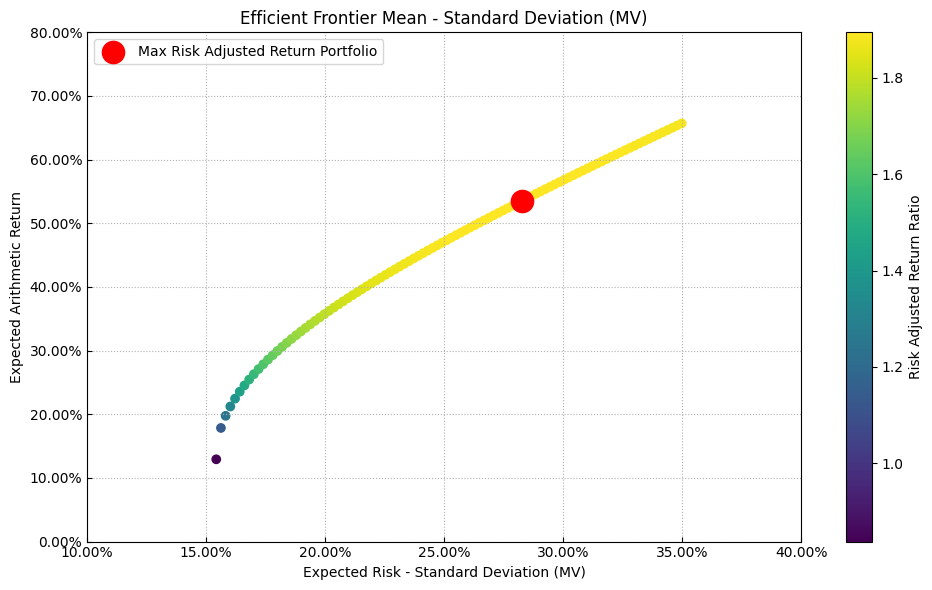

In [99]:
#Plotting the efficient frontier
label = 'Max Risk Adjusted Return Portfolio'
mu = portfolio.mu
cov = portfolio.cov
returns = portfolio.returns

ax = rp.plot_frontier(w_frontier=frontier, mu= mu, cov= cov, rm =  rm, rf= rf, returns = returns, alpha =0.05, cmap = 'viridis', w= w, label=label, marker='o')
